In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
def ER_directed_weighted_graph(n, p, x_min, x_max):
    #x_min Minimum weight
    #x_max Maximum weight
    alpha = 1.85 - 1  # Pareto shape parameter for weight distribution (power-law exponent - 1)
    # Create directed ER graph
    G = nx.erdos_renyi_graph(n, p, directed=True)
    # Assign weights from Pareto distribution
    for u, v in G.edges():
        weight = x_min * (1 + np.random.pareto(alpha))  # Sample from Pareto
        weight = min(weight, x_max)  # Cap max weight at 5000
        G[u][v]['weight'] = weight
    return G

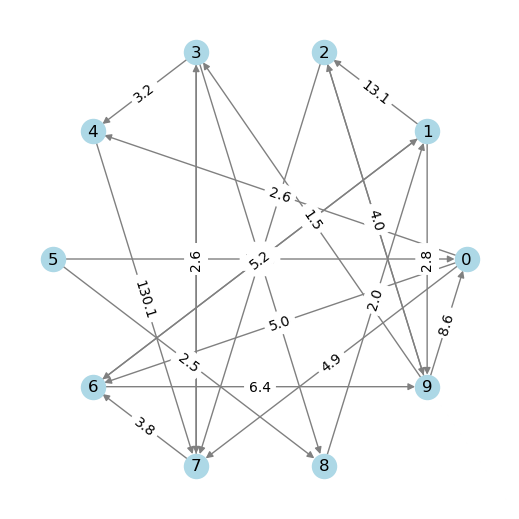

In [4]:
# Parameters
n = 10   # Number of nodes
p = 0.3  # Probability of an edge
x_min = 1  # Minimum weight
x_max = 5000  # Maximum weight
alpha = 1.85 - 1  # Pareto shape parameter

# Create directed ER graph
G = nx.erdos_renyi_graph(n, p, directed=True)

# Assign weights from Pareto distribution
for u, v in G.edges():
    weight = x_min * (1 + np.random.pareto(alpha))  # Sample from Pareto
    weight = min(weight, x_max)  # Cap max weight at 5000
    G[u][v]['weight'] = weight

# Visualize graph
plt.figure(figsize=(5, 5))
pos = nx.circular_layout(G)
edges = G.edges(data=True)
edge_labels = {(u, v): f"{d['weight']:.1f}" for u, v, d in edges}

nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray', arrows=True)
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=10)
plt.show()

In [12]:
# Generate power-law degrees
def generate_power_law_degrees(n, gamma, min_degree):
    """ Generate degrees following a power-law distribution """
    degrees = (np.random.pareto(gamma - 1, n) + 1) * min_degree
    return np.round(degrees).astype(int)  # Convert to integers

def CM_directed_weighted_graph(n, gamma, min_degree, x_min, x_max):
    #x_min Minimum weight
    #x_max Maximum weight
    alpha = 1.85 - 1  # Pareto shape parameter for weight distribution (power-law exponent)
    frac_source = 0.2  # Fraction of source nodes (only out-degree)
    frac_sink = 0.2  # Fraction of sink nodes (only in-degree)
    # Assign node categories
    num_source = int(n * frac_source)  # Nodes with only out-degree
    num_sink = int(n * frac_sink)      # Nodes with only in-degree
    num_both = n - num_source - num_sink  # Nodes with both in/out-degree
    while True:
        # Initialize degree arrays
        out_degrees = np.zeros(n, dtype=int)
        in_degrees = np.zeros(n, dtype=int)
        # Assign degrees
        out_degrees[:num_source] = generate_power_law_degrees(num_source, gamma, min_degree)  # Source nodes
        in_degrees[num_source:num_source + num_sink] = generate_power_law_degrees(num_sink, gamma, min_degree)  # Sink nodes
        in_degrees[num_source + num_sink:] = generate_power_law_degrees(num_both, gamma, min_degree)  # Both
        out_degrees[num_source + num_sink:] = generate_power_law_degrees(num_both, gamma, min_degree) # Both
        # Compute degree difference
        diff = in_degrees.sum() - out_degrees.sum()
        # If balanced, exit loop
        if diff == 0:
            break
        elif diff > 0:
            # Reduce in-degree from nodes with > min_degree
            for i in np.where(in_degrees > min_degree)[0]:
                if diff == 0:
                    break
                in_degrees[i] -= 1
                diff -= 1
        else: # diff < 0
            # Reduce out-degree from nodes with > min_degree
            for i in np.where(out_degrees > min_degree)[0]:
                if diff == 0:
                    break
                out_degrees[i] -= 1
                diff += 1  # Reducing out-degree, so we add back to diff

    # Create the graph using the configuration model
    G = nx.directed_configuration_model(out_degrees, in_degrees)
    G = nx.DiGraph(G)  # Converts to a simple directed graph
    G.remove_edges_from(nx.selfloop_edges(G))  # Remove self-loops
    # Assign weights from Pareto distribution
    for u, v in G.edges():
        weight = x_min * (1 + np.random.pareto(alpha))  # Sample from Pareto
        weight = min(weight, x_max)  # Cap max weight at 5000
        G[u][v]['weight'] = weight
    return G

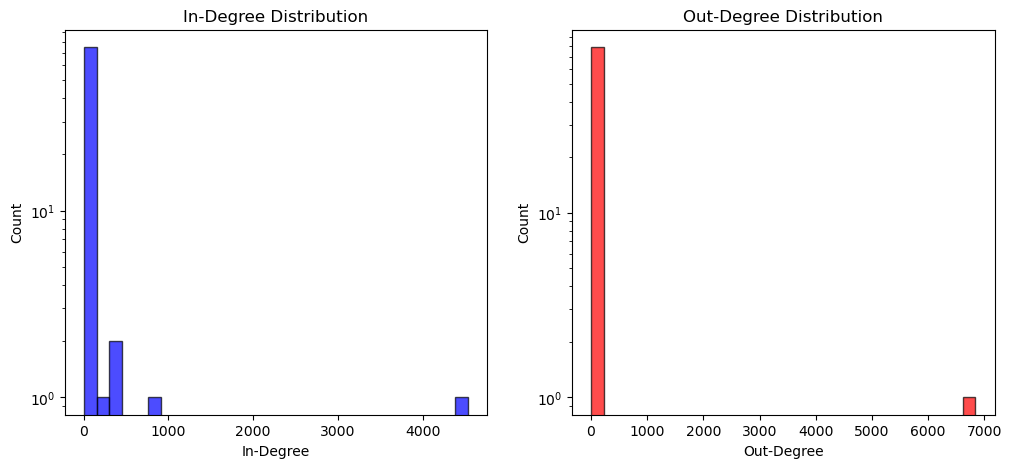

Total Nodes: 100
Source Nodes (only out-degree): 20
Sink Nodes (only in-degree): 20
Both (in-degree & out-degree): 60


In [3]:
# Parameters
n = 100  # Number of nodes
gamma = 1.5  # Power-law exponent
min_degree = 1  # Minimum degree
frac_source = 0.2  # Fraction of source nodes (only out-degree)
frac_sink = 0.2  # Fraction of sink nodes (only in-degree)

# Generate power-law degrees
def generate_power_law_degrees(n, gamma, min_degree):
    """ Generate degrees following a power-law distribution """
    degrees = (np.random.pareto(gamma - 1, n) + 1) * min_degree
    return np.round(degrees).astype(int)  # Convert to integers

# Assign node categories
num_source = int(n * frac_source)  # Nodes with only out-degree
num_sink = int(n * frac_sink)      # Nodes with only in-degree
num_both = n - num_source - num_sink  # Nodes with both in/out-degree

while True:
    # Initialize degree arrays
    out_degrees = np.zeros(n, dtype=int)
    in_degrees = np.zeros(n, dtype=int)

    # Assign degrees
    out_degrees[:num_source] = generate_power_law_degrees(num_source, gamma, min_degree)  # Source nodes
    in_degrees[num_source:num_source + num_sink] = generate_power_law_degrees(num_sink, gamma, min_degree)  # Sink nodes
    in_degrees[num_source + num_sink:] = generate_power_law_degrees(num_both, gamma, min_degree)  # Both
    out_degrees[num_source + num_sink:] = generate_power_law_degrees(num_both, gamma, min_degree) # Both

    # Compute degree difference
    diff = in_degrees.sum() - out_degrees.sum()

    # If balanced, exit loop
    if diff == 0:
        break
    elif diff > 0:
        # Reduce in-degree from nodes with > min_degree
        for i in np.where(in_degrees > min_degree)[0]:
            if diff == 0:
                break
            in_degrees[i] -= 1
            diff -= 1
    else: # diff < 0
        # Reduce out-degree from nodes with > min_degree
        for i in np.where(out_degrees > min_degree)[0]:
            if diff == 0:
                break
            out_degrees[i] -= 1
            diff += 1  # Reducing out-degree, so we add back to diff

# Create the graph using the configuration model
G = nx.directed_configuration_model(out_degrees, in_degrees)
G = nx.DiGraph(G)  # Convert to a simple directed graph (removing self-loops & multi-edges)

# Get node classifications
node_types = {node: "source" if out_degrees[i] > 0 and in_degrees[i] == 0 else
                     "sink" if in_degrees[i] > 0 and out_degrees[i] == 0 else
                     "both" for i, node in enumerate(G.nodes())}

# Visualize degree distributions
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

ax[0].hist([in_degrees[i] for i in range(n) if in_degrees[i] > 0], bins=30, color='blue', alpha=0.7, edgecolor='black', log=True)
ax[0].set_title("In-Degree Distribution")
ax[0].set_xlabel("In-Degree")
ax[0].set_ylabel("Count")

ax[1].hist([out_degrees[i] for i in range(n) if out_degrees[i] > 0], bins=30, color='red', alpha=0.7, edgecolor='black', log=True)
ax[1].set_title("Out-Degree Distribution")
ax[1].set_xlabel("Out-Degree")
ax[1].set_ylabel("Count")

plt.show()

# Count and print node types
print(f"Total Nodes: {n}")
print(f"Source Nodes (only out-degree): {sum(1 for t in node_types.values() if t == 'source')}")
print(f"Sink Nodes (only in-degree): {sum(1 for t in node_types.values() if t == 'sink')}")
print(f"Both (in-degree & out-degree): {sum(1 for t in node_types.values() if t == 'both')}")


In [4]:
out_degrees

array([   2,    5,   11,    2,   14,    2,    1,    2,    9,    2,    2,
          1,    2,   10,    8,    4,    6,    5,    1,   15,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    1,    2,    9,    3,
          2,    1,    2,    1,    1,   27,    1,    2,    1,    1,    2,
          2,   17,   27,   54,   48,    1,  198,    1,    3,    1,    3,
          2,    3,   46,    4,    5,    7,   72,   27,    1,    2,    6,
          1,    8,    1,    2,    1,    3,    2, 6843,   13,   32,   48,
          2,   17,    1,    3,   18,    1,    2,    8,    2,    2,    7,
         14])

In [5]:
in_degrees

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,   11,   96,
        139,    3,    3,    3,    1,    3,    2,    1,   11,   35,    7,
          3,    4,    2,   20,   44,   79,  863,    1,   23,    1,    1,
          1,    3,    1,    3,   11,   14,    3,    4,   15,   18,   27,
          4,    2,    3,   12,    1,  348,    3,   25,  303,    6,   38,
          2,    2,    3,    2,    1,    2,    5,    8,    5,  435,  122,
        106, 4537,   86,    6,    4,    5,    5,   10,    4,    3,    4,
          6,   80,    2,    2,    2,    2,   55,    2,    1,    9,    1,
          1])

DiGraph with 10 nodes and 17 edges 74.64385497072394


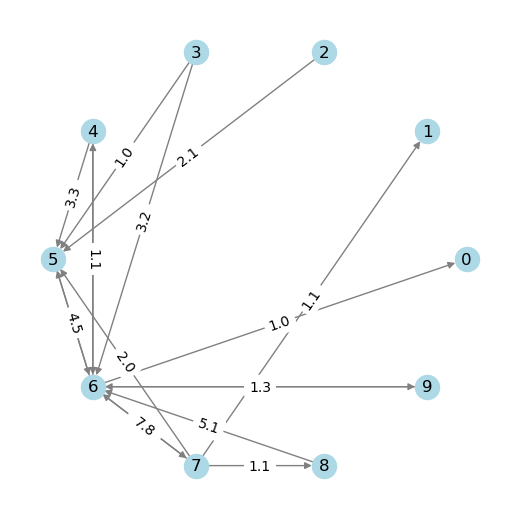

In [15]:
cmG = CM_directed_weighted_graph(10, 1.5, 1, 1, 5000)
print(cmG, cmG.size('weight'))
# Visualize graph
plt.figure(figsize=(5, 5))
pos = nx.circular_layout(cmG)
edges = cmG.edges(data=True)
edge_labels = {(u, v): f"{d['weight']:.1f}" for u, v, d in edges}

nx.draw(cmG, pos, with_labels=True, node_color='lightblue', edge_color='gray', arrows=True)
nx.draw_networkx_edge_labels(cmG, pos, edge_labels=edge_labels, font_size=10)
plt.show()

In [16]:
nx.write_graphml(cmG, "graph.graphml")
G = nx.read_graphml("graph.graphml")
print(G, G.size('weight'))

DiGraph with 10 nodes and 17 edges 74.64385497072394


----

In [1]:
import random_network_generators as rngs
import networkx as nx
import numpy as np

In [2]:
x_min = 1
x_max = 5000
p = 0.3 #0.297 (Sarafu)
for p in [0.2, 0.3]:
    for n in np.arange(100, 1100, 100):
        g = rngs.ER_directed_weighted_graph(n, p, x_min, x_max)
        print('G: ',g, g.size('weight'))
        nx.write_graphml(g, "./output/null_models/ERgraph_"+str(int(p*10))+"_"+str(n)+".graphml")

G:  DiGraph with 100 nodes and 1903 edges 250122.0
G:  DiGraph with 200 nodes and 7923 edges 1388085.0
G:  DiGraph with 300 nodes and 18029 edges 3058407.0
G:  DiGraph with 400 nodes and 31755 edges 5877554.0
G:  DiGraph with 500 nodes and 50057 edges 8747755.0
G:  DiGraph with 600 nodes and 71725 edges 12344668.0
G:  DiGraph with 700 nodes and 97958 edges 17553071.0
G:  DiGraph with 800 nodes and 127695 edges 23868371.0
G:  DiGraph with 900 nodes and 161969 edges 29346645.0
G:  DiGraph with 1000 nodes and 199341 edges 36010997.0
G:  DiGraph with 100 nodes and 2967 edges 468620.0
G:  DiGraph with 200 nodes and 11993 edges 2425304.0
G:  DiGraph with 300 nodes and 26876 edges 4720577.0
G:  DiGraph with 400 nodes and 47647 edges 8921103.0
G:  DiGraph with 500 nodes and 74669 edges 13669684.0
G:  DiGraph with 600 nodes and 107333 edges 19338116.0
G:  DiGraph with 700 nodes and 146481 edges 26941391.0
G:  DiGraph with 800 nodes and 191279 edges 33813504.0
G:  DiGraph with 900 nodes and 2429

In [3]:
# 2min 4sec
x_min = 1
x_max = 5000
for n in np.arange(100, 1100, 100): #
    g = rngs.CM_directed_weighted_graph(n, x_min, x_max)
    print('G: ',g, g.size('weight'))
    nx.write_graphml(g, "./output/null_models/CMgraph_"+str(n)+".graphml")

G:  DiGraph with 100 nodes and 664 edges 178350.0
G:  DiGraph with 200 nodes and 1414 edges 239028.0
G:  DiGraph with 300 nodes and 3341 edges 677123.0
G:  DiGraph with 400 nodes and 4439 edges 727372.0
G:  DiGraph with 500 nodes and 5518 edges 1104682.0
G:  DiGraph with 600 nodes and 8036 edges 1585848.0
G:  DiGraph with 700 nodes and 9508 edges 1652309.0
G:  DiGraph with 800 nodes and 11912 edges 2025266.0
G:  DiGraph with 900 nodes and 14845 edges 3197999.0
G:  DiGraph with 1000 nodes and 16144 edges 3019306.0
